# Урок 6

## Взаимосвязь величин. Показатели корреляции. Корреляционный анализ. Проверка на нормальность

Часто в статистике анализируют _многомерные_ наблюдения, т.е. имеющие несколько признаков.

Для этого применяют многомерный статистический анализ. Особенно часто его используют, когда нужно:

* изучить зависимость между признаками и их влияние на некоторую переменную,
* классифицировать объекты с множеством признаков,
* понизить размерность пространства признаков (если их слишком много и нет возможности отсеять часть).

### Корреляция

__Корреляция__ — математический показатель, по которому можно судить, есть ли статистическая взаимосвязь между двумя и более случайными величинами.

__Коэффициент корреляции__ принимает значения из отрезка $[-1, 1]$.

Если коэффициент корреляции близок к $1$, то между величинами наблюдается прямая связь: увеличение одной величины сопровождается увеличением другой, а уменьшение одной — уменьшением другой.

Если же коэффициент корреляции близок к $-1$, то между величинами есть обратная корреляционная связь: увеличение одной величины сопровождается уменьшением другой и наоборот.

Коэффициент корреляции, равный $0$, говорит о том, что между величинами нет связи, то есть величины изменяются независимо друг от друга.

__Пример 1__

Посчитаем корреляцию роста с весом хоккеистов из рассмотренного ранее датасета. Это можно сделать с помощью метода `.corr`, который есть у объектов `DataFrame`.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('hockey_players.csv', encoding='cp1251')
df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


In [4]:
df[['height', 'weight']].corr()

,height,weight
height,1.00000,0.69311
weight,0.69311,1.00000


В результате получается матрица корреляций. Мы видим, что корреляция роста и веса достаточно высока. Можно сделать вывод, что, как правило, чем выше рост хоккеиста, тем больше его вес.

Рассмотрим также корреляцию этих признаков с возрастом хоккеистов:

In [4]:
df[['height', 'weight', 'age']].corr()

,height,weight,age
height,1.000000,0.693731,-0.077862
weight,0.693731,1.000000,0.090665
age,-0.077862,0.090665,1.000000


In [5]:
df['age'].describe()

count    3294.000000
mean       26.379341
std         4.247066
min        17.642710
25%        23.245038
50%        25.895962
75%        29.135524
max        41.505818
Name: age, dtype: float64

Видно, что корреляция возраста достаточно низка как с ростом, так и с весом спортсменов.

### Взаимосвязь величин

Если две величины коррелируют, это может свидетельствовать о наличии _статистической связи_ между ними. Однако, говорить о ней мы можем только для величин из одной выборки. Корреляция величин в одной выборке не гарантирует того, что подобная связь встретится и в другой выборке и должна будет иметь такую же природу. 

Высокая корреляция между величинами не может быть интерпретирована как наличие причинно-следственной связи между ними.

Например, если рассмотреть данные о пожарах в городе, можно увидеть, что между материальными потерями, вызванными пожаром, и количеством пожарных, которые принимали участие в его тушении, есть сильная корреляция. При этом ложным будет вывод о том, что большое количество пожарных, присутствующих на пожаре, приводит к увеличению ущерба от него. 

Высокая корреляция двух величин может свидетельствовать о том, что у них есть _общая причина_, несмотря на то, что прямого взаимодействия между двумя коррелирующими величинами нет. 

Например, наступление зимы может быть причиной и  роста заболеваемости простудой, и повышения расходов на отопление. Эти две величины (число заболевших и расходы на отопление) имеют высокую корреляцию между собой, хотя они друг на друга напрямую не влияют.

Напротив, отсутствие корреляции между двумя величинами еще не говорит о том, что между показателями нет связи. 
Вполне возможно, что между признаками есть нелинейная зависимость, которую не может уловить используемый коэффициент корреляции.

__Пример 2__

Посчитаем корреляцию между ростом и BMI (_Body Mass Index_, т.е. _Индекс массы тела_). BMI равен весу, разделённому на квадрат роста:
$$BMI = \dfrac{weight}{height^2}.$$

In [6]:
df[['height', 'weight', 'bmi']].corr()

,height,weight,bmi
height,1.000000,0.693731,-0.067106
weight,0.693731,1.000000,0.670663
bmi,-0.067106,0.670663,1.000000


In [7]:
df.describe()

,year,no,height,weight,age,cohort,bmi
count,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000
mean,2006.860959,28.520036,183.829387,87.464633,26.379341,1980.365513,25.865320
std,4.453502,22.776900,5.467629,7.043294,4.247066,6.802670,1.498745
min,2001.000000,1.000000,165.000000,65.000000,17.642710,1963.000000,19.460881
25%,2004.000000,12.000000,180.000000,83.000000,23.245038,1975.000000,24.901982
50%,2006.000000,23.000000,184.000000,87.000000,25.895962,1980.000000,25.811182
75%,2010.000000,37.000000,188.000000,92.000000,29.135524,1985.000000,26.861207
max,2016.000000,98.000000,205.000000,117.000000,41.505818,1998.000000,30.930438


Как мы видим, коэффициент корреляции не улавливает зависимость между ростом и BMI. Это можно объяснить тем, что зависимость между ними не линейная, а квадратичная.

### Показатели корреляции

__Ковариация__ — мера линейной зависимости случайных величин. Её формула похожа на формулу дисперсии (_variance_). 

Формула ковариации случайных величин $X$ и $Y$:
$$\operatorname{cov}(X, Y) = M\left( (X - M(X)) (Y - M(Y)) \right).$$

Оценка ковариации бывает смещённой и несмещённой. Несмещённую оценку можно посчитать следующим образом:
$$\sigma_{XY} = \dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^n (x_i - \overline{X}) \cdot (y_i - \overline{Y})$$

Здесь $X$, $Y$ — выборки размера $n$.

__Пример 3__

Посчитаем ковариацию между ростом и весом хоккеистов.

In [8]:
X = df['height']
Y = df['weight']

MX = X.mean()
MY = Y.mean()

cov = ((X - MX) * (Y - MY)).sum() / (X.shape[0] - 1)
cov

25.98645551425497

Также с помощью `numpy`:

In [5]:
import numpy as np

In [9]:
np.cov(X, Y)

array([[28.98592385, 25.98645551],
       [25.98645551, 48.49556786]])

Эта функция возвращает не значение ковариации, а т.н. __матрицу ковариаций__. В ней по диагонали стоят вариации (т.е. дисперсии) каждой из выборок, а вне диагонали — попарные ковариации.

In [11]:
X.var(ddof=1), Y.var(ddof=1)

(28.985923846242812, 48.49556786059397)

Значение ковариации случайных величин сильно зависит от уровня разброса каждой из величин. Например, если в предыдущем примере домножить одну из выборок на какую-то константу, коэффициент ковариации также увеличится:

In [12]:
np.cov(X * 10, Y)

array([[2898.59238462,  259.86455514],
       [ 259.86455514,   48.49556786]])

Поэтому в качестве числовой характеристики зависимости случайных величин лучше использовать __коэффициент корреляции Пирсона__:
$$r_{XY} = \dfrac{\sigma_{XY}}{\sigma_X \cdot \sigma_Y}$$

Здесь $\sigma_X$, $\sigma_Y$ — среднее квадратическое отклонение.

__Пример 4__

Посчитаем коэффициент корреляции для выборок из предыдущего примера. Для вычисления средних квадратических отклонений воспользуемся методом `.std`, который по умолчанию вычисляет несмещённую оценку.

In [14]:
corr = cov / (X.std() * Y.std(ddof = 1))
corr

0.6937305679663021

Коэффициент корреляции Пирсона считается по умолчанию с помощью метода `.corr` объектов `pandas.DataFrame`, с помощью которого мы вычисляли корреляцию ранее:

In [15]:
df[['height', 'weight']].corr()

,height,weight
height,1.000000,0.693731
weight,0.693731,1.000000


Ту же самую матрицу корреляций можно получить с помощью функции `numpy.corrcoef`.

In [16]:
np.corrcoef(X, Y)

array([[1.        , 0.69373057],
       [0.69373057, 1.        ]])

Плюсы использования коэффициента Пирсона:
* Использует много информации (средние и отклонения выборок),
* Позволяет проводить тесты на значимость корреляции: статистика
$$t = \frac{r \sqrt{n - 2}}{\sqrt{1 - r^2}}$$
имеет распределение Стьюдента с $n - 2$ степенями свободы.

Минусы:
* Выборки должны иметь нормальное распределение,
* Измеряет уровень _линейной зависимости_.

__Ранговая корреляция__

Помимо линейной зависимости существует также понятие __ранговой__ (или __порядковой__) зависимости. Это тип зависимости, при котором увеличение значения одной случайной величины соответствует увеличению второй, а уменьшение первой — уменьшению второй. Однако, в отличие от линейной зависимости, при ранговой зависимости не требуется чтобы степень увеличения или уменьшения двух значений были линейно зависимы.

Высокое значение ранговой корреляции означает, что если отсортировать два массива по возрастанию первого, то второй также будет возрастать.

__Пример 5__

Сгенерируем выборку из экспоненциального распределения размера $100$. Вторую выборку получим, возведя первую в пятую степень. (Т.е. в этом случае имеем прямую зависимость между выборками.)

In [8]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

[0.97498178 6.46015519 0.62258294 1.06047867 0.1692231  1.42558961
 1.20217767 0.65541492 2.458672   0.09053111]


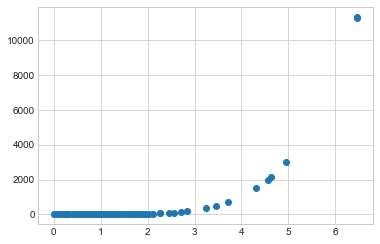

In [32]:
x = np.random.exponential(size=100)
y = x ** 5

plt.scatter(x, y)
print(x[:10])


Посчитаем коэффициент корреляции Пирсона:

In [21]:
np.corrcoef(x, y)

array([[1.        , 0.77919672],
       [0.77919672, 1.        ]])

Несмотря на наличие прямой зависимости между переменными, коэффициент корреляции Пирсона оказался не очень высоким. Причина в том, что, как мы уже отмечали, коэффициент Пирсона отражает уровень именно линейной зависимости.

Если нас интересует уровень зависимости вообще, ранговые показатели оказываются более полезными.

Популярными коэффициентами ранговой корреляции являются коэффициент Кендалла и коэффициент Спирмана. Мы здесь рассмотрим первый из них.

Допустим, $(x_1, y_1)$, ..., $(x_m, y_m)$ — все пары значений двух выборок. Две пары $(x_i, y_i)$ и $(x_j, y_j)$ называются __согласованными__, если $x_i < x_j$ и $y_i < y_j$, или наоборот $x_i > x_j$ и $y_i > y_j$. В противном случае они называются __несогласованными__. 

Пусть $P$ — число всех согласованных комбинаций из двух пар, а $Q$ — число всех несогласованных комбинаций двух пар. __Коэффициент корреляции Кендалла__:
$$\tau = \dfrac{P - Q}{P + Q}$$

_Замечание_. Такое определение коэффициента Кендалла возможно только если выборки $X$ и $Y$ не имеют повторов. Существуют уточнённые версии коэффициента Кендалла, допускающие повторы, но мы их здесь не приводим.

__Пример 5 (продолжение)__

Посчитаем коэффициент Кендалла для сравнения. Сперва сделаем это вручную.

In [30]:
def is_concordant(pair1, pair2):
    """Являются ли две пары согласованными.
    """
    
    
    return (pair1[0] - pair2[0]) * (pair1[1] - pair2[1]) > 0

Число согласованных и несогласованных пар посчитаем с использованием функции `combinations` из библиотеки `itertools`. Она возвращает итератор по всем сочетаниям из заданного набора.

In [29]:
from itertools import combinations

In [23]:
list(combinations(range(6), r=2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 4),
 (3, 5),
 (4, 5)]

In [24]:
list(zip(x, y))[:10]

[(0.7065043898221218, 0.17602498795672986),
 (1.3892297328949517, 5.174523319548499),
 (0.2937400755258958, 0.0021868349743233437),
 (0.5562780307551091, 0.053267160041067234),
 (0.12074833320801542, 2.5668809249094807e-05),
 (0.3655259161977354, 0.006525155590427973),
 (1.5234943091058948, 8.207373193049305),
 (0.7150917753936187, 0.18698592419283347),
 (0.03347330397798619, 4.202356644856421e-08),
 (2.145543746328435, 45.46601279231207)]

In [31]:
P = 0
Q = 0
i = 0

for pair1, pair2 in combinations(zip(x, y), r=2):
    if i < 10:
        print(pair1, pair2)
        i += 1
    if is_concordant(pair1, pair2):
        P += 1
    else:
        Q += 1
        
P, Q

(1.3979385555769839, 5.3387602116861315) (1.1897941798162286, 2.3842906772190906)
(1.3979385555769839, 5.3387602116861315) (0.44143973876563697, 0.01676320787720087)
(1.3979385555769839, 5.3387602116861315) (1.056446194940105, 1.315942508826257)
(1.3979385555769839, 5.3387602116861315) (2.9452092835783157, 221.60563717391582)
(1.3979385555769839, 5.3387602116861315) (0.12277999128694854, 2.7902170687677915e-05)
(1.3979385555769839, 5.3387602116861315) (1.9489316653559596, 28.117911483524875)
(1.3979385555769839, 5.3387602116861315) (1.2308295125054836, 2.824811713948914)
(1.3979385555769839, 5.3387602116861315) (0.9292833522282743, 0.6930120481364641)
(1.3979385555769839, 5.3387602116861315) (1.1388352776590025, 1.9155988120212093)
(1.3979385555769839, 5.3387602116861315) (0.5729022793222911, 0.06171670772424807)


(4950, 0)

Итак, коэффициент:

In [28]:
tau = (P - Q) / (P + Q)
tau

1.0

Готовая реализация коэффициента Кендалла есть в библиотеке `pandas`. В метод `.corr` нужно подать аргумент `method='kendall'`.

In [29]:
pd.DataFrame({'x': x, 'y': y}).corr(method='kendall')

,x,y
x,1.0,1.0
y,1.0,1.0


Коэффициент ранговой корреляции Спирмена рассчитывается с помощью метода `method='spearman'`

In [12]:
pd.DataFrame({'x': x, 'y': y}).corr(method='spearman')

,x,y
x,1.0,1.0
y,1.0,1.0


Плюсы использования коэффициента Кендалла:
* Не требует нормальности распределений,
* Порядковая зависимость является обобщением линейной.

Минусы:
* Использует меньше информации, чем коэффициент Пирсона (соответствие значений между парами элементов),
* Прямое проведение тестов на значимость корреляции малореально.

### Проверка на нормальность

Ранее мы неоднократно отмечали, что применимость того или иного метода сильно зависит от того, является ли распределение в нашей выборке нормальным. 

Методы проверки на нормальность делятся на 3 класса:
1. Графические методы:
    * Гистограмма,
    * Q-Q кривая,
2. Методы на основании правил разброса (стандартное отклонение, 2 сигмы, 3 сигмы),
3. Статистические методы:
    * Колмогорова-Смирнова,
    * Шапиро-Уилка,
    * ...

Как следует из названия, __графическе методы__ используют для проверки на нормальность различные графики и диаграммы.

Например, по выборке можно построить гистограмму и оценить, насколько она «похожа» на гистограмму нормального распределения.

__Пример 6__

Построим гистограммы некоторых признаков из нашего датасета о хоккеистах. Поверх них нарисуем функции плотностей для нормальных распределений с соответствующими параметрами.

In [14]:
from scipy import stats

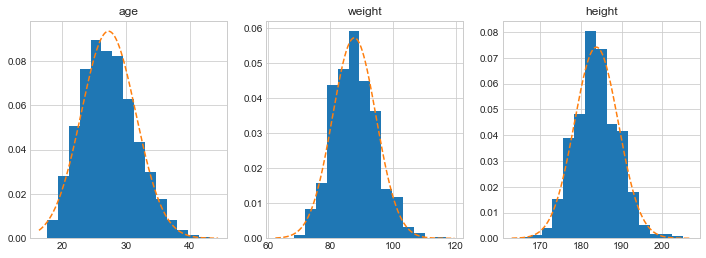

In [22]:
keys = ['age', 'weight', 'height']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(4 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=15)
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

Другой способ графически оценить нормальность выборки — __Q-Q кривая__ (или __кривая квантиль-квантиль__):
1. По данной выборке считаем выборочные среднее $a$ и среднее квадратическое отклонение $\sigma$.
2. Для каждого значения $\alpha \in (0, 1)$ откладываем по оси $x$ квантиль порядка $\alpha$ для нормального распределения с параметрами $a$, $\sigma$, а по оси $y$ — выборочный квантиль порядка $\alpha$.

Получившийся набор точек должен лежать на прямой $f(x) = x$. Оценить близость получившихся точек к данной прямой можно с помощью _парной регрессии_ (об этом — на следующем занятии).

__Пример 7__

Построим Q-Q кривую для выборок из предыдущего примера.

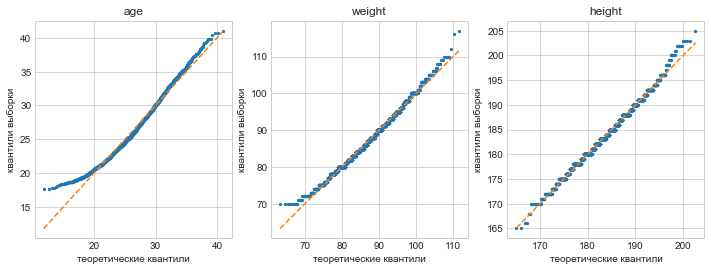

In [34]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(4 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

In [35]:
df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


Ещё один способ оценить нормальность выборки — известные нам правила разброса для нормального распределения:
* Вероятность попасть в интервал от $\mu - \sigma$ до $\mu + \sigma$ равна $0.68$,
* В интервал от $\mu - 2\sigma$ до $\mu + 2\sigma$ — $0.95$,
* В интервал от $\mu - 3\sigma$ до $\mu + 3\sigma$ — $0.997$.

Данные правила должны приблизительно выполняться для выборки из нормального распределения.

__Пример 8__

Применим перечисленные выше правила для всё тех же двух выборок.

In [36]:
for key in keys:
    print(key)
    
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

age
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6675774134790529
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9638737097753491
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9963570127504554

weight
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.664541590771099
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9553734061930783
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9963570127504554

height
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.680327868852459
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9556769884638737
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9942319368548876



Наконец, существует несколько статистических методов, позволяющих проверить гипотезу о нормальности распределения. Например, часто для таких задач используются критерий согласия Пирсона, метод Шапиро-Уилка или метод Колмогорова-Смирнова. Проверяется нулевая гипотеза о том, что распределение нормальное

In [24]:
alpha = 0.05

loc = 3
scale = 2
samples = np.random.normal(loc, scale, size=10000)

# stats.normaltest(samples)
H0 - распределение нормально
stat, p = stats.normaltest(samples)
print('Statistics = ', round(stat, 3),  '\tp-value = ', round(p, 3))

Statistics =  2.548 	p-value =  0.28


## Упражнения

__Задача 1__

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
1. Найдите ковариацию этих двух величин: сначала без использования специальных функций, а затем с помощью функции `numpy.cov`. Полученные значения должны быть равны.
2. Найдите коэффициент корреляции Пирсона: с помощью ковариации и средних квадратических отклонений двух признаков, а затем с помощью специальных функций из библиотек `numpy` и `pandas`.

__Задача 2__

Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:
```
131, 125, 115, 122, 131, 115, 107, 99, 125, 111
```
Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

__Задача 3__

Известно, что рост футболистов в сборной распределен нормально с известной дисперсией 25. На выборке объёма 27 выборочное среднее составило 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

__Задача 4__

Выберите тему для проектной работы по курсу Теории вероятностей и математической статистики и напишите ее в комментарии к Практическому заданию.

## Курсовая работа

В рамках курсовой работы вам предстоит:
* выбрать интересующий вас датасет,
* поставить себе одну или несколько (в зависимости от ваших сил) задач, которые можно было бы на этих данных решить с помощью изученных на этом курсе методик,
* реализовать решение этих задач,
* потренироваться в оформлении результатов своего исследования.


Примеры тем (просто для референса, рекомендуется всё же придумать что-то своё):
* Проверить гипотезу: комедийные фильмы, снятые до 1990 года, в среднем имеют более высокую оценку, чем комедийные фильмы снятые позже.
* Статистическое сопоставление цены биткоина с курсами фиатных активов (USD,EUR,RUR), ценами на нефть, драг металлы или с ценами других криптовалют по отношению к биткоину. (Это не по `imdb`, но допускается, если хотите.)
* Исследование статистической связи между бюджетом фильма и полученной прибылью.
* Анализ по Странам по данным `imdb.com`: По странам расчитать основные статистические показатели: Мода, медиана, квартили, дисперсию. Проверить, работает ли нормальное распределение. Проверить есть ли зависимость бюджетов, рейтингов, жанров от страны выпуска фильмов. Посмотреть поведение стран во времени. 

Где искать данные?
* на [kaggle](https://www.kaggle.com/)
* просторы интернета
* рабочие проекты

Оформление:
1. Оформляйте подробно. Суть проекта и основные шаги должны быть понятны человеку, который эти данные никогда раньше не видел.
2. Структурировать можно, например, так:
    1. Тема проекта, ваши цели
    2. Краткое описание датасета и признаков, которые вы собираетесь использовать в работе
    3. Описание основных шагов:
        * Препроцессинг, работа с данными
        * Математический аппарат, если используете не самые базовые концепции
        
Дедлайн: неделя после 8 занятия.